In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/california_housing_test.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [3]:
df.shape

(3000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


## Build a machine model to get the median house value

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
model

LinearRegression()

In [8]:
# provide some inputs and output
X = df.loc[:,["total_rooms","total_bedrooms"]]
X

,total_rooms,total_bedrooms
0,3885.0,661.0
1,1510.0,310.0
2,3589.0,507.0
3,67.0,15.0
4,1241.0,244.0
...,...,...
2995,1450.0,642.0
2996,5257.0,1082.0
2997,956.0,201.0
2998,96.0,14.0


In [9]:
y = df.loc[:,"median_house_value"]
y

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64

In [10]:
# train the model:
model.fit(X,y)

LinearRegression()

In [12]:
# test the model
model.predict([[3885.0,661.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([232258.77415083])

In [13]:
# Actual value is : 344700
# predicted value : 232258
Error = 344700 - 232258
Error

112442

## Data Visualization

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

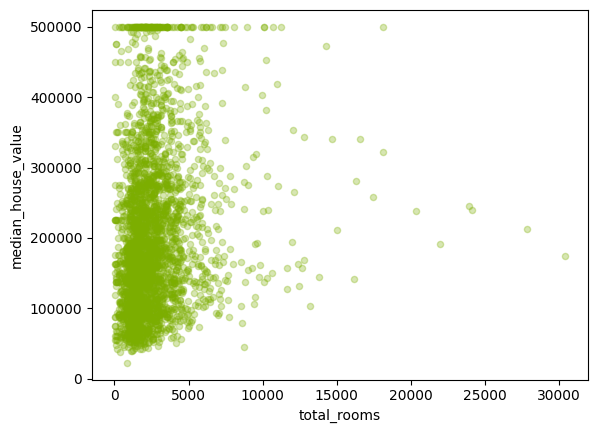

In [16]:
df.plot.scatter(x="total_rooms",y="median_house_value",color="#7CAE00",alpha=.3)

In [17]:
df[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [23]:
test = df[["total_bedrooms"]]
test

,total_bedrooms
0,661.0
1,310.0
2,507.0
3,15.0
4,244.0
...,...
2995,642.0
2996,1082.0
2997,201.0
2998,14.0


In [24]:
model.fit(test,y)

LinearRegression()

In [25]:
pred = model.predict(test)
pred

array([208780.7528023 , 200921.10420731, 205332.35997145, ...,
       198480.35863222, 194293.02448047, 199868.67262906])

## Data visualization of predicted results

Text(0.5, 1.0, 'Linear Regression Chart')

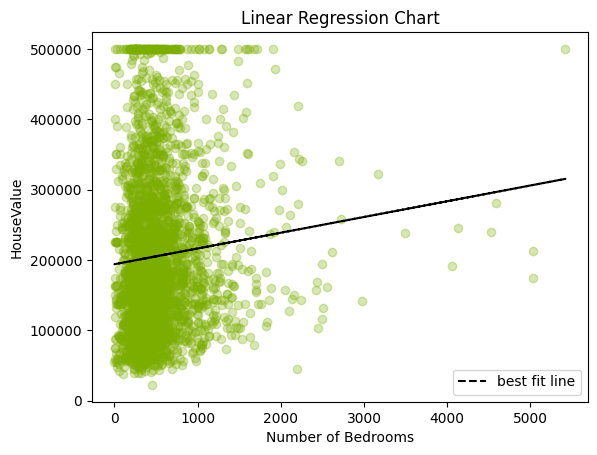

In [32]:
plt.plot(test,pred,c="k",ls="--",label="best fit line")
plt.legend()
plt.scatter(x=df.total_bedrooms,y=df.median_house_value,color="#7CAE00",alpha=.3)
plt.xlabel("Number of Bedrooms")
plt.ylabel("HouseValue")
plt.title("Linear Regression Chart")

# Negative linear relation.....